In [1]:
# Miscellaneous Python Dependencies
import itertools
import warnings
from numbers import Number
import os
import sys
#module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
#if module_path not in sys.path:
#    sys.path.append(module_path)

# Big Four Data Analysis Frameworks
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# Additional Data Manipulation Tools
# import xlrd
from scipy import stats
import statsmodels.api as sm


# SQL Database Tools
import sqlite3
# import sqldf

%load_ext autoreload
%autoreload 2
warnings.filterwarnings('ignore')

In [2]:
# SciKit-Learn Dependencies (Ml and Data Proc)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_digits, load_sample_images

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier,\
ExtraTreesClassifier, VotingClassifier, StackingRegressor

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import r2_score
# NOTE: Removed `sklearn.metrics.plot_confusion_matrix` due to deprecation. Might have to replace later.
# NOTE: Removed `sklearn.metrics.roc_auc_curve` and `sklearn.metrics.plot_roc_curve` because it was mean to us.
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

In [4]:
from sklearn.model_selection import TimeSeriesSplit
import datetime as dt

In [5]:
CPI_All_df = pd.read_csv('Data\CPI_All_Items.csv')

FF_df = pd.read_csv('Data\FEDFUNDSRATE.csv')

Labor_ofage_df = pd.read_csv('Data\Labor_25_64.csv')

GDP_df = pd.read_csv('Data\GDP.csv')

Labor_Part_df = pd.read_csv('Data\Labor_Participation.csv')

M1_Velo = pd.read_csv('Data\M1Velo.csv')

M2_Real = pd.read_csv('Data\M2REAL.csv')

M2_all = pd.read_csv('Data\M2SL.csv')

M2_Velo = pd.read_csv('Data\M2Velo.csv')

MFG_Cap = pd.read_csv('Data\Manfcturing_capacity.csv')

DG_Orders = pd.read_csv('Data\Manufacturer_DG_Orders_starts_1992.csv')

Median_CPI = pd.read_csv('Data\Median_CPI.csv')

PCE_DG = pd.read_csv('Data\PCE_Durable_Goods.csv')

PCEsansFE = pd.read_csv('Data\PCE_Sans_FE.csv')

Prod_Mfg = pd.read_csv('Data\Production_manufacturing.csv')

Raw_UE = pd.read_csv('Data\Raw_Unemployment.csv')

Stick_CPIsansFE = pd.read_csv('Data\Sticky_CPI_Sans_FE.csv')

fiveyr_diff = pd.read_csv('Data\T5Y_minus_FF.csv')

tenyr_diff = pd.read_csv('Data\T10Y_minus_FF.csv')

UE_Rate = pd.read_csv(r'Data\Unemployment_Rate.csv')

M1 = pd.read_csv('Data\WM1NS.csv')

GBP = pd.read_csv('Data\EXUSUK.csv')

JPY = pd.read_csv('Data\EXJPUS.csv')

EUR = pd.read_csv('Data\EXUSEU.csv')

Inf = pd.read_csv('Data\Inflation.csv')

In [6]:

Inf['DATE']=Inf['Date']

In [7]:
Inf = Inf.drop(labels=['Date'], axis=1)
Inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Inflation Change  396 non-null    float64
 1   DATE              396 non-null    object 
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [8]:
CPI_All_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             408 non-null    object 
 1   CPALTT01USM657N  408 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.5+ KB


In [279]:
#making a dataframe from imported csvs 

from functools import reduce
data_frames = [FF_df, Labor_ofage_df, GDP_df, Labor_Part_df, M1_Velo, M2_Real, M2_all, M2_Velo,
               MFG_Cap, DG_Orders, Median_CPI, PCE_DG, PCEsansFE, Prod_Mfg, Raw_UE, Stick_CPIsansFE, EUR, GBP, JPY, Inf]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['DATE'],
                how='left'), data_frames)

#df_merged = df_merged.merge(UE_Rate ,on='DATE')

df_merged['DATE']=pd.to_datetime(df_merged['DATE'])

df_merged = df_merged[df_merged['DATE'] > '1989-12-31']
df_merged = df_merged[df_merged['DATE'] < '2022-12-31']


df_merged

,DATE,FEDFUNDS,LNS11300060,GDP,CIVPART,M1V,M2REAL,M2SL,M2V,MCUMFN,...,MEDCPIM158SFRBCLE,PCEDG,DPCCRV1A225NBEA,IPMAN,UNEMPLOY,CORESTICKM159SFRBATL,CCEUSP01USM651N,EXUSUK,EXJPUS,Inflation Change
0,1990-01-01,8.23,83.8,5872.701,66.8,7.356,2483.8,3166.8,1.848,81.3184,...,5.216140,536.4,4.1,57.9700,6752,4.905908,NaN,1.6512,144.9819,0.0
1,1990-02-01,8.24,83.8,NaN,66.7,NaN,2483.8,3179.2,NaN,82.2381,...,4.981650,505.9,NaN,58.7845,6651,4.917559,NaN,1.6961,145.6932,0.2
2,1990-03-01,8.28,83.6,NaN,66.7,NaN,2480.6,3190.1,NaN,82.4549,...,5.250468,503.8,NaN,59.0954,6598,5.191525,NaN,1.6245,153.3082,0.3
3,1990-04-01,8.26,83.5,5960.028,66.6,7.391,2483.8,3201.6,1.859,81.9226,...,5.314374,505.7,NaN,58.8633,6797,5.276985,NaN,1.6372,158.4586,-0.1
4,1990-05-01,8.18,83.5,NaN,66.6,NaN,2479.2,3200.6,NaN,81.9744,...,3.966494,495.3,NaN,59.0444,6742,5.166732,NaN,1.6774,154.0441,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2022-08-01,2.33,82.8,NaN,62.4,NaN,7337.0,21659.6,NaN,79.4958,...,8.048036,2146.3,NaN,100.9427,5983,5.951312,1.000000,1.1983,135.2835,0.4
392,2022-09-01,2.56,82.6,NaN,62.3,NaN,7263.6,21525.1,NaN,79.5684,...,7.729216,2156.4,NaN,101.1402,5755,6.348017,1.025851,1.1320,143.2843,0.3
393,2022-10-01,3.08,82.5,26408.405,62.3,1.323,7195.7,21433.2,1.234,79.5555,...,6.693666,2172.1,NaN,101.2339,5950,6.312946,1.008675,1.1332,147.0515,-0.3
394,2022-11-01,3.78,82.4,NaN,62.1,NaN,7165.4,21399.3,NaN,78.8698,...,5.916617,2111.5,NaN,100.4743,5956,6.422543,0.963763,1.1727,142.4450,-0.3


In [10]:
#back filling and front filling for data that is collected quarterly

df_merged = df_merged.fillna(method='ffill')
df_merged = df_merged.fillna(method='bfill')
df_merged

,DATE,FEDFUNDS,LNS11300060,GDP,CIVPART,M1V,M2REAL,M2SL,M2V,MCUMFN,...,MEDCPIM158SFRBCLE,PCEDG,DPCCRV1A225NBEA,IPMAN,UNEMPLOY,CORESTICKM159SFRBATL,CCEUSP01USM651N,EXUSUK,EXJPUS,Inflation Change
0,1990-01-01,8.23,83.8,5872.701,66.8,7.356,2483.8,3166.8,1.848,81.3184,...,5.216140,536.4,4.1,57.9700,6752,4.905908,0.878426,1.6512,144.9819,0.0
1,1990-02-01,8.24,83.8,5872.701,66.7,7.356,2483.8,3179.2,1.848,82.2381,...,4.981650,505.9,4.1,58.7845,6651,4.917559,0.878426,1.6961,145.6932,0.2
2,1990-03-01,8.28,83.6,5872.701,66.7,7.356,2480.6,3190.1,1.848,82.4549,...,5.250468,503.8,4.1,59.0954,6598,5.191525,0.878426,1.6245,153.3082,0.3
3,1990-04-01,8.26,83.5,5960.028,66.6,7.391,2483.8,3201.6,1.859,81.9226,...,5.314374,505.7,4.1,58.8633,6797,5.276985,0.878426,1.6372,158.4586,-0.1
4,1990-05-01,8.18,83.5,5960.028,66.6,7.391,2479.2,3200.6,1.859,81.9744,...,3.966494,495.3,4.1,59.0444,6742,5.166732,0.878426,1.6774,154.0441,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2022-08-01,2.33,82.8,25994.639,62.4,1.271,7337.0,21659.6,1.202,79.4958,...,8.048036,2146.3,5.2,100.9427,5983,5.951312,1.000000,1.1983,135.2835,0.4
392,2022-09-01,2.56,82.6,25994.639,62.3,1.271,7263.6,21525.1,1.202,79.5684,...,7.729216,2156.4,5.2,101.1402,5755,6.348017,1.025851,1.1320,143.2843,0.3
393,2022-10-01,3.08,82.5,26408.405,62.3,1.323,7195.7,21433.2,1.234,79.5555,...,6.693666,2172.1,5.2,101.2339,5950,6.312946,1.008675,1.1332,147.0515,-0.3
394,2022-11-01,3.78,82.4,26408.405,62.1,1.323,7165.4,21399.3,1.234,78.8698,...,5.916617,2111.5,5.2,100.4743,5956,6.422543,0.963763,1.1727,142.4450,-0.3


In [11]:
len(df_merged)

396

In [12]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 0 to 395
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  396 non-null    datetime64[ns]
 1   FEDFUNDS              396 non-null    float64       
 2   LNS11300060           396 non-null    float64       
 3   GDP                   396 non-null    float64       
 4   CIVPART               396 non-null    float64       
 5   M1V                   396 non-null    float64       
 6   M2REAL                396 non-null    float64       
 7   M2SL                  396 non-null    float64       
 8   M2V                   396 non-null    float64       
 9   MCUMFN                396 non-null    float64       
 10  DGORDER               396 non-null    float64       
 11  MEDCPIM158SFRBCLE     396 non-null    float64       
 12  PCEDG                 396 non-null    float64       
 13  DPCCRV1A225NBEA       396

In [13]:
#trying different rate buckets

In [14]:
def Rate_Increase_1(Rate):
    if Rate > .0:
        return 1
    elif Rate == 0:
        return 0
    elif Rate < 0:
        return -1

In [15]:
def Rate_Increase_2(Rate):
   if Rate > .25:
       return 2
   elif Rate > .0 and Rate <= .25:
       return 1
   elif Rate == 0:
       return 0
   elif Rate >= -.25 and Rate < 0:
       return -1
   else:
        return -2

In [164]:
def Rate_Increase_3(Rate):
   if Rate >= .1:
       return 1
   elif Rate > 0 and Rate < .1:
       return 0
   elif Rate == 0:
       return 0
   elif Rate > -.1 and Rate < 0:
       return 0
   else:
        return -1

In [165]:
#getting the rate change from previous month

df_merged['Difference'] = df_merged['FEDFUNDS']-df_merged['FEDFUNDS'].shift()

In [166]:
df_merged['Outcome'] = df_merged['Difference'].apply(Rate_Increase_3)

In [167]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 0 to 395
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  396 non-null    datetime64[ns]
 1   FEDFUNDS              396 non-null    object        
 2   LNS11300060           396 non-null    float64       
 3   GDP                   396 non-null    float64       
 4   CIVPART               396 non-null    float64       
 5   M1V                   396 non-null    float64       
 6   M2REAL                396 non-null    float64       
 7   M2SL                  396 non-null    float64       
 8   M2V                   396 non-null    float64       
 9   MCUMFN                396 non-null    float64       
 10  DGORDER               396 non-null    float64       
 11  MEDCPIM158SFRBCLE     396 non-null    float64       
 12  PCEDG                 396 non-null    float64       
 13  DPCCRV1A225NBEA       396

In [168]:
#mapping numerical to Vergbiage

mymap = {-1:'Decrease', 0: 'No Change', 1:' Increase'}
df_test=df_merged.applymap(lambda s: mymap.get(s) if s in mymap else s)


In [266]:
df_test['Outcome'].value_counts()

Outcome
No Change    262
 Increase     71
Decrease      63
Name: count, dtype: int64

In [281]:

#fig, ax = plt.subplots(figsize = (12,7))
#sns.barplot(x = df_test['Outcome'].sort_values().unique(), y =  df_test['Outcome'].value_counts()).set(title='Distribution of Outcomes')


In [170]:
df_merged

,DATE,FEDFUNDS,LNS11300060,GDP,CIVPART,M1V,M2REAL,M2SL,M2V,MCUMFN,...,DPCCRV1A225NBEA,IPMAN,UNEMPLOY,CORESTICKM159SFRBATL,CCEUSP01USM651N,EXUSUK,EXJPUS,Inflation Change,Difference,Outcome
0,1990-01-01,8.23,83.8,5872.701,66.8,7.356,2483.8,3166.8,1.848,81.3184,...,4.1,57.9700,6752,4.905908,0.878426,1.6512,144.9819,0.0,NaN,-1
1,1990-02-01,8.24,83.8,5872.701,66.7,7.356,2483.8,3179.2,1.848,82.2381,...,4.1,58.7845,6651,4.917559,0.878426,1.6961,145.6932,0.2,0.01,0
2,1990-03-01,8.28,83.6,5872.701,66.7,7.356,2480.6,3190.1,1.848,82.4549,...,4.1,59.0954,6598,5.191525,0.878426,1.6245,153.3082,0.3,0.04,0
3,1990-04-01,8.26,83.5,5960.028,66.6,7.391,2483.8,3201.6,1.859,81.9226,...,4.1,58.8633,6797,5.276985,0.878426,1.6372,158.4586,-0.1,-0.02,0
4,1990-05-01,8.18,83.5,5960.028,66.6,7.391,2479.2,3200.6,1.859,81.9744,...,4.1,59.0444,6742,5.166732,0.878426,1.6774,154.0441,0.0,-0.08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2022-08-01,2.33,82.8,25994.639,62.4,1.271,7337.0,21659.6,1.202,79.4958,...,5.2,100.9427,5983,5.951312,1.000000,1.1983,135.2835,0.4,0.65,1
392,2022-09-01,2.56,82.6,25994.639,62.3,1.271,7263.6,21525.1,1.202,79.5684,...,5.2,101.1402,5755,6.348017,1.025851,1.1320,143.2843,0.3,0.23,1
393,2022-10-01,3.08,82.5,26408.405,62.3,1.323,7195.7,21433.2,1.234,79.5555,...,5.2,101.2339,5950,6.312946,1.008675,1.1332,147.0515,-0.3,0.52,1
394,2022-11-01,3.78,82.4,26408.405,62.1,1.323,7165.4,21399.3,1.234,78.8698,...,5.2,100.4743,5956,6.422543,0.963763,1.1727,142.4450,-0.3,0.70,1


In [171]:
conn = sqlite3.connect('df_merged')

In [172]:
#EDA

query = """
SELECT Outcome, COUNT(Outcome) Amount
FROM df_merged
GROUP BY Outcome
ORDER BY Amount DESC
LIMIT 100
"""


In [173]:
df_merged['Difference'] = df_merged['Difference'].fillna(0)
df_merged['Outcome'] = df_merged['Outcome'].fillna(0)

In [175]:
#splitting time series data

tss = TimeSeriesSplit(n_splits = 4)

In [176]:
#dropping columns to prevent data leakage

X = df_merged.drop(labels=['Outcome'], axis=1)
X = X.drop(labels=['FEDFUNDS'], axis=1)
X = X.drop(labels=['Difference'], axis=1)
y = df_merged['Outcome']

In [177]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [282]:
Logreg = LogisticRegression()

In [283]:
Linreg = LinearRegression()

In [181]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 316
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  317 non-null    datetime64[ns]
 1   LNS11300060           317 non-null    float64       
 2   GDP                   317 non-null    float64       
 3   CIVPART               317 non-null    float64       
 4   M1V                   317 non-null    float64       
 5   M2REAL                317 non-null    float64       
 6   M2SL                  317 non-null    float64       
 7   M2V                   317 non-null    float64       
 8   MCUMFN                317 non-null    float64       
 9   DGORDER               317 non-null    float64       
 10  MEDCPIM158SFRBCLE     317 non-null    float64       
 11  PCEDG                 317 non-null    float64       
 12  DPCCRV1A225NBEA       317 non-null    float64       
 13  IPMAN                 317

In [182]:
X_train['DATE'] = pd.to_datetime(X_train['DATE'])
X_train['DATE']=X_train['DATE'].map(dt.datetime.toordinal)

In [183]:
X_test['DATE'] = pd.to_datetime(X_test['DATE'])
X_test['DATE']=X_test['DATE'].map(dt.datetime.toordinal)

In [ ]:
#Scaling

In [184]:
scaler = preprocessing.MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train_df = pd.DataFrame(X_train_scaled)

In [185]:
X_train.info

<bound method DataFrame.info of        DATE  LNS11300060        GDP  CIVPART    M1V  M2REAL     M2SL    M2V  \
0    726468         83.8   5872.701     66.8  7.356  2483.8   3166.8  1.848   
1    726499         83.8   5872.701     66.7  7.356  2483.8   3179.2  1.848   
2    726527         83.6   5872.701     66.7  7.356  2480.6   3190.1  1.848   
3    726558         83.5   5960.028     66.6  7.391  2483.8   3201.6  1.859   
4    726588         83.5   5960.028     66.6  7.391  2479.2   3200.6  1.859   
..      ...          ...        ...      ...    ...     ...      ...    ...   
312  735964         81.1  18525.933     62.7  5.927  5247.1  12469.9  1.476   
313  735995         81.1  18525.933     62.8  5.927  5290.7  12556.7  1.476   
314  736024         81.3  18525.933     63.0  5.927  5299.4  12616.7  1.476   
315  736055         81.2  18711.702     62.9  5.798  5314.2  12700.4  1.466   
316  736085         81.2  18711.702     62.7  5.798  5329.1  12766.2  1.466   

      MCUMFN   DGOR

In [186]:
#linear regression simple model
Linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [187]:
y_pred = Linreg.predict(X_train_scaled)

In [188]:
#results = confusion_matrix(y_test, y_pred)

Linreg.coef_

array([ -1.94556918,  -0.95022983,   8.49793835,   3.26890533,
        -1.9030107 ,  15.4650264 , -19.02490525,   0.92278786,
         2.56463355,  -1.12096802,   0.13247604,   0.86745122,
        -0.10471587,   0.1674777 ,   1.61939087,  -0.32978745,
        -0.20382149,  -0.34759878,   0.08947088,   0.84238728])

In [189]:
X_test_scaled2 = np.reshape(X_test_scaled, (-1,1))
X_test_scaled2

#print(Linreg.score(X_test_scaled2, y_test))

array([[0.        ],
       [0.45454545],
       [0.        ],
       ...,
       [0.29892249],
       [0.7350829 ],
       [0.19047619]])

In [191]:
lr1 = LinearRegression()
lr1.fit(X_train_scaled, y_train)

LinearRegression()

In [192]:
lr1.score(X_train_scaled, y_train)

0.35944792929556146

In [193]:
lr1.score(X_test_scaled, y_test)

#oof

-7.032337503924733

In [194]:
#logistic regression simple model

logreg_clf = LogisticRegression()

In [195]:
logreg_clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [196]:
logreg_clf.score(X_train_scaled, y_train)

0.6971608832807571

In [197]:
logreg_clf.score(X_test_scaled, y_test)

0.5569620253164557

In [198]:
## Making Decision Tree - change to classifier

tree_clf = DecisionTreeClassifier(criterion = 'gini', random_state=42)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [265]:
tree_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 30, splitter = 'best' , random_state=42, min_samples_split=2, \
                                 min_samples_leaf=2)
tree_clf.fit(X_train, y_train)

tree_predictions = tree_clf.predict(X_test)
# Accuracy on training data & test data
print('Training:', tree_clf.score(X_train, y_train))
print('Testing:', tree_clf.score(X_test, y_test))
print(classification_report(y_test,tree_predictions))


Training: 0.9274447949526814
Testing: 0.7848101265822784
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         5
           0       0.78      0.94      0.85        52
           1       0.81      0.59      0.68        22

    accuracy                           0.78        79
   macro avg       0.53      0.51      0.51        79
weighted avg       0.74      0.78      0.75        79



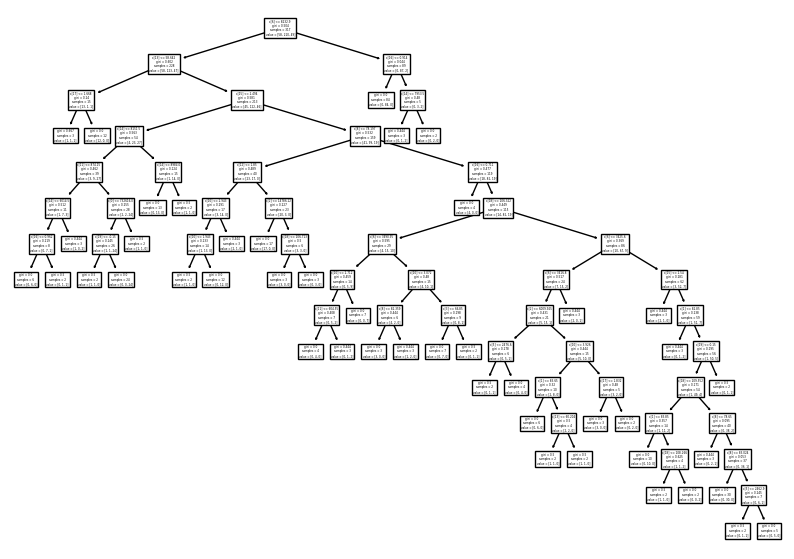

In [278]:
f, ax = plt.subplots(figsize=(10, 7))
plot_tree(tree_clf, ax=ax);

In [ ]:
#making bagging classifier

In [210]:
bag_class_decision = BaggingClassifier(base_estimator = DecisionTreeClassifier())
bag_pipe = Pipeline([('model',bag_class_decision)])
params = {    'base_estimator__max_depth' : [1, 10, 15, 20],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
         }
cv = GridSearchCV(estimator = bag_pipe, param_grid = params, cv = 5)

In [254]:
bag_clf = BaggingClassifier(
                            DecisionTreeClassifier( max_depth=200,
                                                    random_state=42,
                                                    criterion='gini',
                                                    splitter = 'best', 
                                                    min_samples_split=5,
                                                    min_samples_leaf=5),
                                                    
n_estimators=500,
max_samples=150,
bootstrap=True,
random_state=42)

In [255]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=200,
                                                   min_samples_leaf=5,
                                                   min_samples_split=5,
                                                   random_state=42),
                  max_samples=150, n_estimators=500, random_state=42)

In [256]:
bag_predictions = bag_clf.predict(X_test)
# Accuracy on training data & test data
print('Training:', bag_clf.score(X_train, y_train))
print('Testing:', bag_clf.score(X_test, y_test))
print(classification_report(y_test,bag_predictions))

Training: 0.861198738170347
Testing: 0.6582278481012658
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         5
           0       0.66      1.00      0.79        52
           1       0.00      0.00      0.00        22

    accuracy                           0.66        79
   macro avg       0.22      0.33      0.26        79
weighted avg       0.43      0.66      0.52        79



In [257]:
param_grid = {
    'base_estimator__max_depth' : [1, 10, 15, 20],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}
clf_test = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                                     n_estimators = 100),
                   param_grid)
clf_test.fit(X_train_scaled, y_train)

GridSearchCV(estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         n_estimators=100),
             param_grid={'base_estimator__max_depth': [1, 10, 15, 20],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]})

In [213]:
best_model = clf_test.best_estimator_
clf_test.best_params_

{'base_estimator__max_depth': 1, 'max_samples': 0.05}

In [214]:
clf_test.best_score_
cv_preds = clf_test.predict(X_test)
print(classification_report(y_test,cv_preds))

              precision    recall  f1-score   support

          -1       0.06      0.80      0.11         5
           0       0.79      0.21      0.33        52
           1       0.00      0.00      0.00        22

    accuracy                           0.19        79
   macro avg       0.28      0.34      0.15        79
weighted avg       0.52      0.19      0.23        79



In [215]:
#random forrest classifier

rf_pipe = Pipeline([('model', RandomForestClassifier(n_estimators = 100))])

In [217]:
rf_params = {'model__n_estimators': [50, 100, 200] ,
             'model__min_samples_leaf': [2,4,7],
             'model__min_samples_split': [2,5,15,20],
            'model__max_depth':[10,15,20,25]}
rf_cv = GridSearchCV(estimator = rf_pipe, param_grid = rf_params, cv = 5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [10, 15, 20, 25],
                         'model__min_samples_leaf': [2, 4, 7],
                         'model__min_samples_split': [2, 5, 15, 20],
                         'model__n_estimators': [50, 100, 200]})

In [218]:
rf_cv.best_score_

0.46542658730158737

In [219]:
best_rf_model = rf_cv.best_estimator_
best_rf_model

Pipeline(steps=[('model',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=4,
                                        min_samples_split=15,
                                        n_estimators=50))])

In [220]:
best_rf_model.fit(X_train, y_train)

Pipeline(steps=[('model',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=4,
                                        min_samples_split=15,
                                        n_estimators=50))])

In [221]:
y_rfcv_pred = best_rf_model.predict(X_test)
print('Training:', best_rf_model.score(X_train, y_train))
print('Testing:', best_rf_model.score(X_test, y_test))
print(classification_report(y_test,y_rfcv_pred))

Training: 0.886435331230284
Testing: 0.6582278481012658
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         5
           0       0.66      1.00      0.79        52
           1       0.00      0.00      0.00        22

    accuracy                           0.66        79
   macro avg       0.22      0.33      0.26        79
weighted avg       0.43      0.66      0.52        79

